# **Flowers Dataset Information**
[Flowers Recognition](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)

**Dataset Overview**

This dataset contains 4317 images of flowers.
The data collection is based on the data flicr, google images, yandex images.

*   Image size: 256x256 pixel (resized)
*   Number of color channels: 3 (RGB)
*   The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion)
*   Number of Images: 4317 pcs

**Number of images in each class**

* daisy: 764 images
* dandelion: 1052 images
* rose: 784 images
* sunflower: 733 images
* tulip: 984 images

That means, dandelions and tulips are a little bit overrepresented in the dataset. This distribution may influence model performance, as models can be biased towards more frequent classes. Addressing this imbalance can involve techniques like class balancing—using data augmentation to increase images for less represented classes, such as daisy and sunflower—or applying a weighted loss function during training to mitigate bias.

**The pixel intensity distribution across classes shows that**
he pixel intensity distribution across flower classes reveals the following:

* Dominance of Dark Pixels: All classes show a high concentration of low-intensity (dark) pixels in the 0.0 to 0.1 range, likely due to shadows or dark backgrounds.

* Bright Pixels in Specific Classes: Tulips and sunflowers have pronounced peaks at both the low and high intensity ends, indicating a high contrast with many bright areas. This may suggest these flowers have more distinct highlights or bright backgrounds compared to other classes.

* Class-Specific Differences: Other classes, such as dandelions and daisies, have a relatively more balanced spread across intensities without strong peaks at the edges, reflecting less extreme contrasts in their images.

# **CelebA Dataset Information**
[CelebFaces Attributes](https://www.kaggle.com/datasets/jessicali9530/celeba-dataset)

**Dataset Overview**

This dataset contains 202,599 images of various celebrities.

*   Image size: 256x256 pixel (resized)
*   Number of color channels: 3 (RGB)
*   The pictures are divided into 10,177 unique identities, but names of identities are not given classes: chamomile, tulip, rose, sunflower, dandelion)
*   Number of Images: 202,599 pcs

**Pose Variation Analysis:** With images exhibiting various angles and expressions, the dataset aids in developing robust face detection systems that perform well under different conditions.

**Number of images per attribute:**
The dataset includes 40 binary attributes for each image, These are the most common attributes:

*   No Beard: 170,000 images (approx.)
*   Young: 160,000 images (approx.)
*   Attractive: 105,000 images (approx.)
*   Mouth slightly open: 100,000 images (approx.)
*   Smiling: 100,000 images (approx.)





In [ ]:
import torchvision.transforms as TF
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import zipfile
from PIL import Image
import seaborn as sns
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import torchvision.transforms as transforms
from collections import defaultdict
import random
import cv2

In [ ]:
!pip install kaggle

!kaggle datasets download -d alxmamaev/flowers-recognition
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 97% 217M/225M [00:00<00:00, 272MB/s]
100% 225M/225M [00:00<00:00, 257MB/s]
Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 98% 1.31G/1.33G [00:05<00:00, 221MB/s]
100% 1.33G/1.33G [00:05<00:00, 256MB/s]


In [ ]:
with zipfile.ZipFile('flowers-recognition.zip', 'r') as zip_ref:
    zip_ref.extractall('flowers-recognition')

with zipfile.ZipFile('celeba-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('celeba')

In [ ]:
flowers_dataset_path = "flowers-recognition/flowers"

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

flowers_dataset = ImageFolder(root=flowers_dataset_path, transform=transform)

In [ ]:
def print_dataset_stats(dataset):
    print(f"Number of classes: {len(dataset.classes)}")
    print(f"Classes: {dataset.classes}")
    class_counts = [0] * len(dataset.classes)

    for _, label in dataset:
        class_counts[label] += 1

    print("Number of images in each class:")
    for class_name, count in zip(dataset.classes, class_counts):
        print(f"{class_name}: {count} images")

print("Flowers Dataset Stats:")
print_dataset_stats(flowers_dataset)

Flowers Dataset Stats:
Number of classes: 5
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Number of images in each class:
daisy: 764 images
dandelion: 1052 images
rose: 784 images
sunflower: 733 images
tulip: 984 images


Sample Images from Different Classes in the Flowers Dataset:


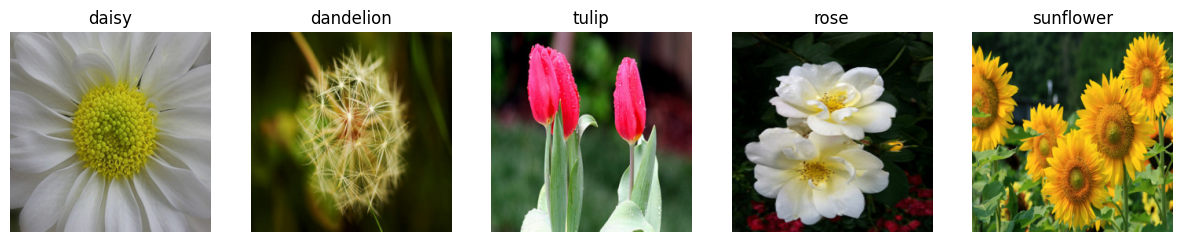

In [ ]:

def plot_sample_images_from_different_classes(dataset, num_samples=5):
    unique_labels = list(set(dataset.targets))
    random.shuffle(unique_labels)  # Shuffle to get random classes

    selected_labels = unique_labels[:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, label in enumerate(selected_labels):
        img_idx = dataset.targets.index(label)
        img, _ = dataset[img_idx]  # Load image

        axes[i].imshow(img.permute(1, 2, 0))
        axes[i].set_title(dataset.classes[label])
        axes[i].axis('off')

    plt.show()

print("Sample Images from Different Classes in the Flowers Dataset:")
plot_sample_images_from_different_classes(flowers_dataset)

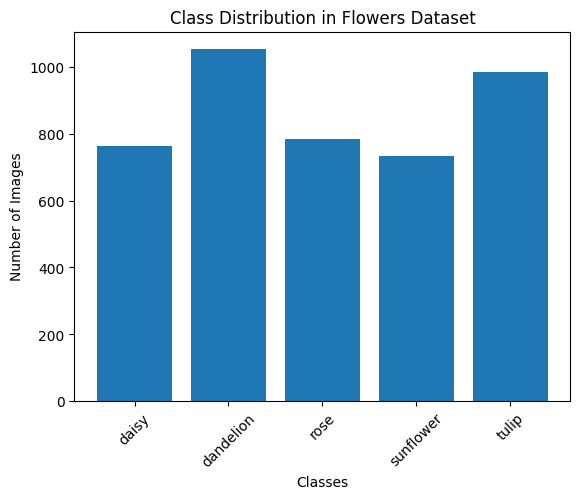

In [ ]:
def plot_class_distribution(dataset):
    class_counts = [0] * len(dataset.classes)

    for _, label in dataset:
        class_counts[label] += 1

    plt.bar(dataset.classes, class_counts)
    plt.xticks(rotation=45)
    plt.title("Class Distribution in Flowers Dataset")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.show()

plot_class_distribution(flowers_dataset)

Pixel Intensity Distribution per Class:


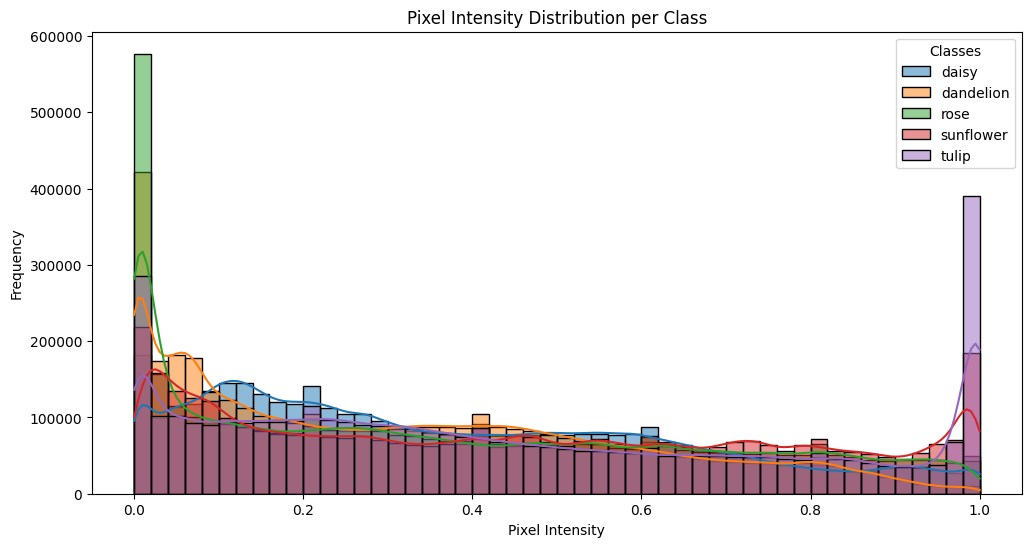

In [ ]:

def plot_pixel_intensity_distribution_per_class(dataset, num_samples_per_class=20):
    pixel_intensity_data = defaultdict(list)
    samples_per_class = {class_name: 0 for class_name in dataset.classes}

    for img, label in dataset:
        class_name = dataset.classes[label]

        if samples_per_class[class_name] < num_samples_per_class:
            img = img.view(-1)  # Lapítjuk az intenzitási értékeket egy dimenzióba
            pixel_intensity_data[class_name].extend(img.numpy())
            samples_per_class[class_name] += 1

        if all(count >= num_samples_per_class for count in samples_per_class.values()):
            break

    plt.figure(figsize=(12, 6))
    for class_name, intensities in pixel_intensity_data.items():
        sns.histplot(intensities, bins=50, kde=True, label=class_name, alpha=0.5)

    plt.title("Pixel Intensity Distribution per Class")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend(title="Classes")
    plt.show()

print("Pixel Intensity Distribution per Class:")
plot_pixel_intensity_distribution_per_class(flowers_dataset, num_samples_per_class=20)


Color Distribution per Class:


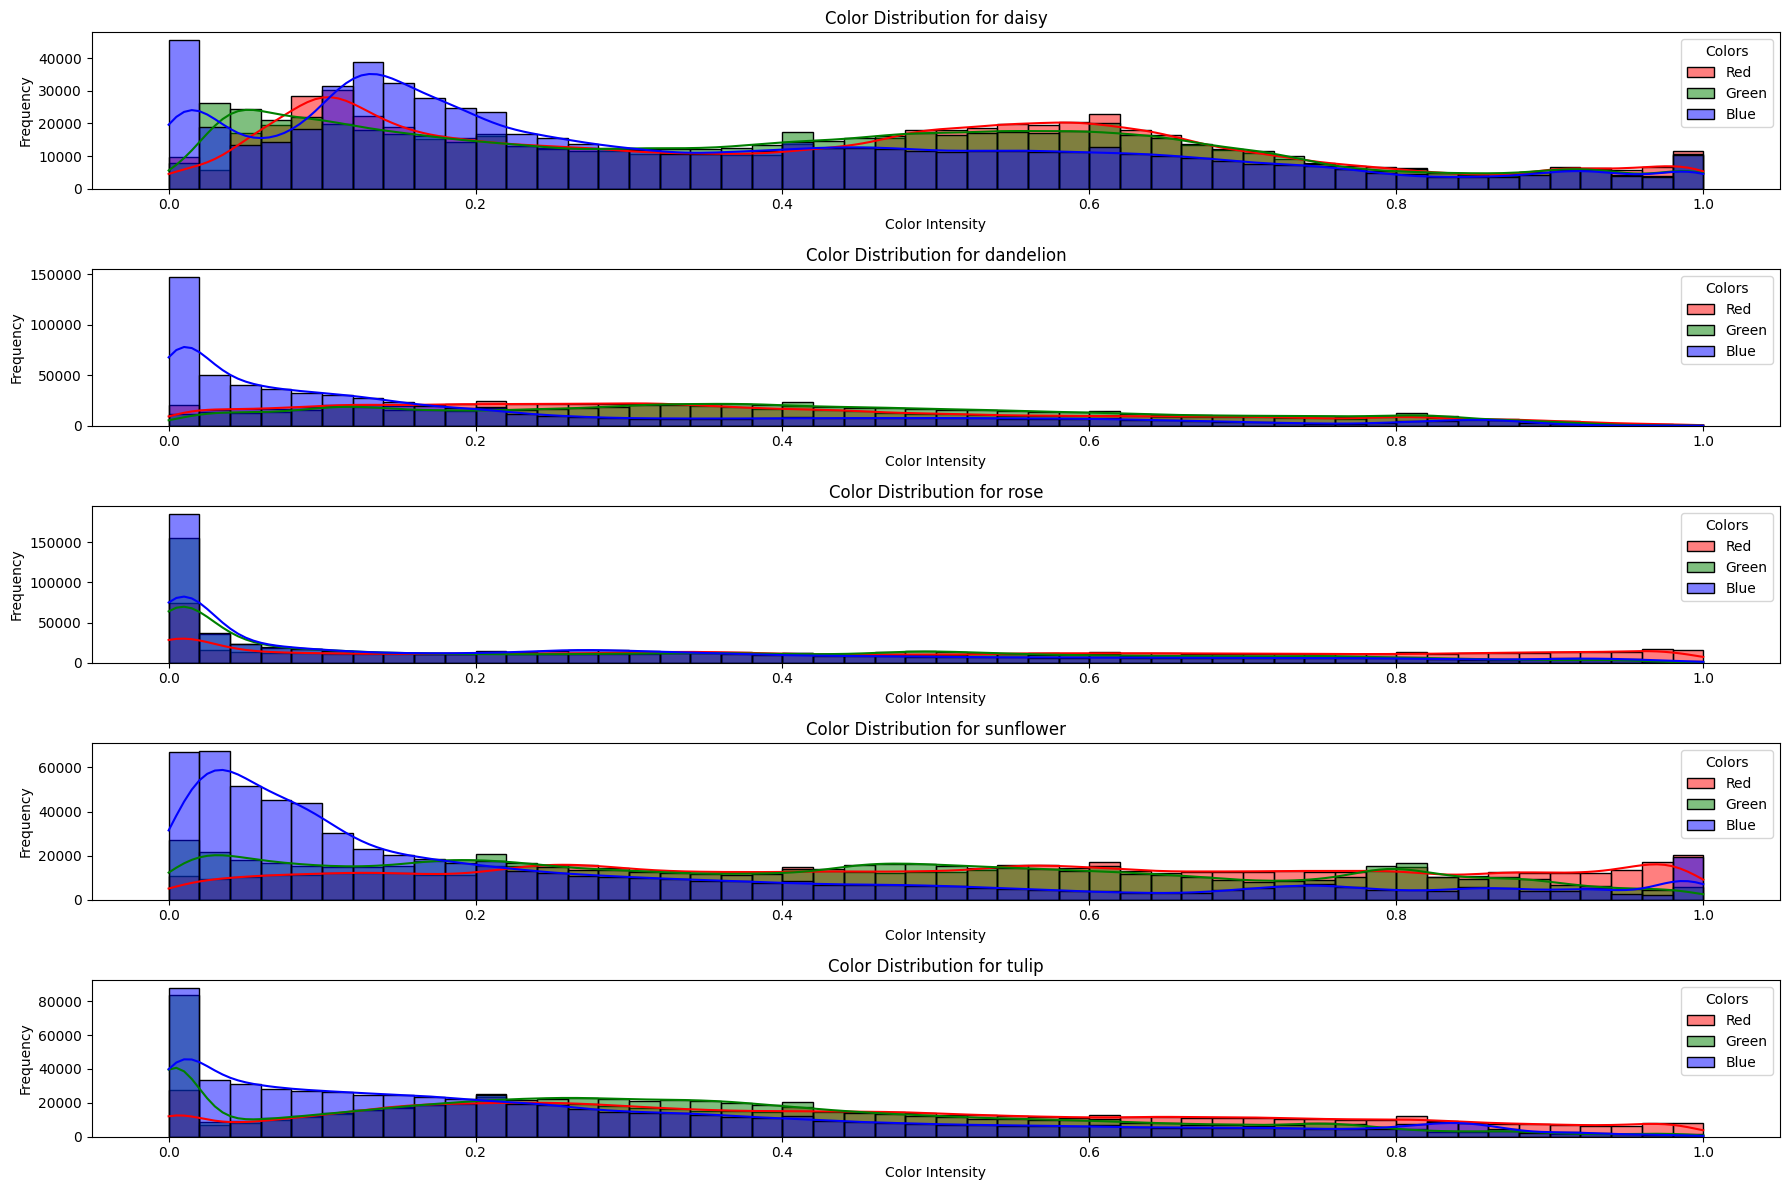

In [ ]:
def plot_color_distribution_per_class(dataset, num_samples_per_class=10):
    color_data = defaultdict(lambda: {'red': [], 'green': [], 'blue': []})
    samples_per_class = {class_name: 0 for class_name in dataset.classes}

    for img, label in dataset:
        class_name = dataset.classes[label]

        if samples_per_class[class_name] < num_samples_per_class:
            img_np = img.permute(1, 2, 0).numpy()
            color_data[class_name]['red'].extend(img_np[:, :, 0].flatten())
            color_data[class_name]['green'].extend(img_np[:, :, 1].flatten())
            color_data[class_name]['blue'].extend(img_np[:, :, 2].flatten())
            samples_per_class[class_name] += 1

        if all(count >= num_samples_per_class for count in samples_per_class.values()):
            break

    plt.figure(figsize=(18, 12))
    for i, (class_name, colors) in enumerate(color_data.items()):
        plt.subplot(len(color_data), 1, i + 1)
        sns.histplot(colors['red'], bins=50, color='red', kde=True, label='Red', alpha=0.5)
        sns.histplot(colors['green'], bins=50, color='green', kde=True, label='Green', alpha=0.5)
        sns.histplot(colors['blue'], bins=50, color='blue', kde=True, label='Blue', alpha=0.5)
        plt.title(f"Color Distribution for {class_name}")
        plt.xlabel("Color Intensity")
        plt.ylabel("Frequency")
        plt.legend(title="Colors")

    plt.tight_layout()
    plt.show()

print("Color Distribution per Class:")
plot_color_distribution_per_class(flowers_dataset, num_samples_per_class=10)


In [ ]:
celeba_dataset_path = 'celeba/img_align_celeba'
partition_file = 'celeba/list_eval_partition.csv'
bbox_file = 'celeba/list_bbox_celeba.csv'
landmarks_file = 'celeba/list_landmarks_align_celeba.csv'
attributes_file = 'celeba/list_attr_celeba.csv'

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

celeba_dataset = ImageFolder(root=celeba_dataset_path, transform=transform)
attributes_df = pd.read_csv(attributes_file)

print(attributes_df.columns)


Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')


In [ ]:
def print_dataset_stats(attributes_df):
    print(f"Total Images: {attributes_df.shape[0]}")
    print(f"Total Attributes: {attributes_df.shape[1] - 1}")
    print(f"Unique Identities: {attributes_df.shape[0]}")
    print(f"Attributes: {attributes_df.columns[1:].tolist()}")

print("CelebA Dataset Stats:")
print_dataset_stats(attributes_df)

CelebA Dataset Stats:
Total Images: 202599
Total Attributes: 40
Unique Identities: 202599
Attributes: ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


Sample Images with Attributes from CelebA:


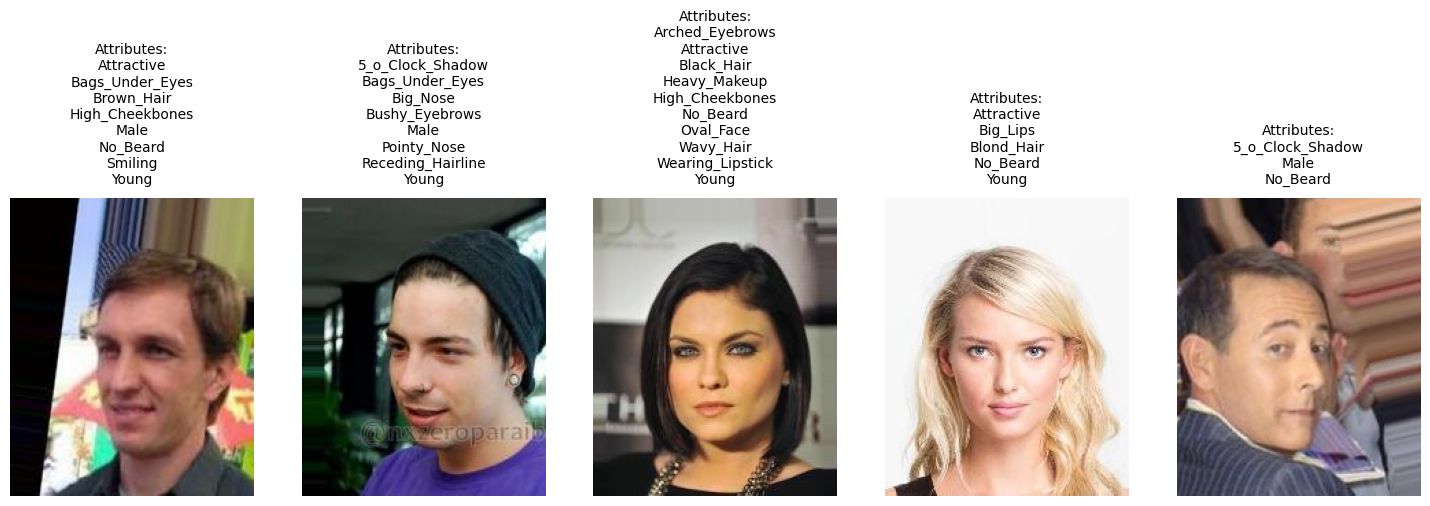

In [ ]:
import cv2

def plot_sample_images_with_attributes(attributes_df, num_samples=5):
    random_indices = random.sample(range(attributes_df.shape[0]), num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        img_name = attributes_df.iloc[idx, 0]
        img_path = os.path.join(celeba_dataset_path, 'img_align_celeba', img_name)

        img = cv2.imread(img_path)

        if img is None:
            print(f"Error: Image not found or could not be opened at {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].axis('off')

        # Prepare attributes string
        attributes = attributes_df.iloc[idx, 1:]  # All columns after the first are attributes
        attribute_names = attributes[attributes == 1].index.tolist()

        # Format the title to avoid overlap
        title_text = "Attributes:\n" + "\n".join(attribute_names)
        axes[i].set_title(title_text, fontsize=10, pad=10, loc='center')  # Centered title with padding

    plt.tight_layout(pad=3.0)  # Adjust layout for better spacing
    plt.show()

print("Sample Images with Attributes from CelebA:")
plot_sample_images_with_attributes(attributes_df, num_samples=5)


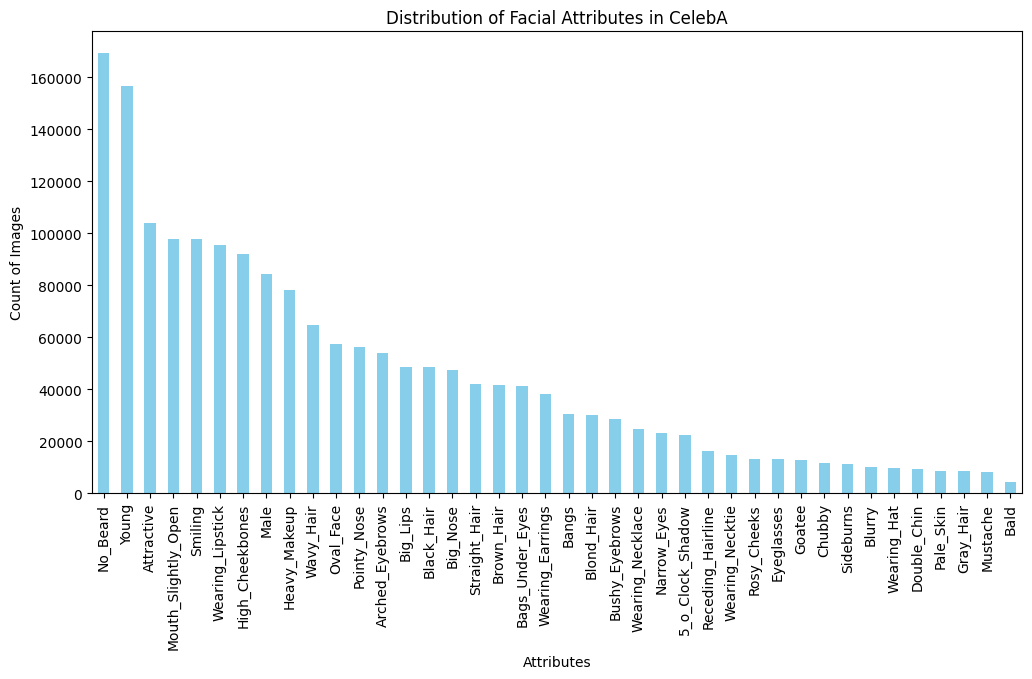

In [ ]:
def plot_attribute_distribution(attributes_df):
    attributes_df = attributes_df.replace(-1, 0)

    attr_counts = attributes_df.iloc[:, 1:].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    attr_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Facial Attributes in CelebA')
    plt.xlabel('Attributes')
    plt.ylabel('Count of Images')
    plt.xticks(rotation=90)
    plt.show()

plot_attribute_distribution(attributes_df)


Sample Images with Landmarks:


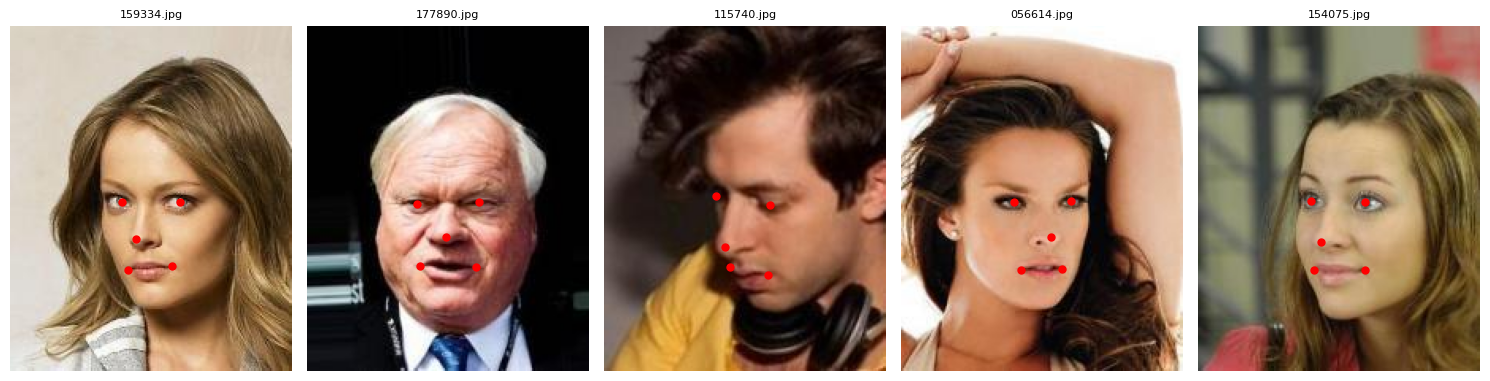

In [ ]:
landmarks_df = pd.read_csv(landmarks_file)

def plot_landmarks(images_df, landmarks_df, num_samples=5):
    random_indices = random.sample(range(images_df.shape[0]), num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        img_name = images_df.iloc[idx, 0]  # First column is the image file name
        img_path = os.path.join(celeba_dataset_path, 'img_align_celeba', img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        landmarks = landmarks_df.iloc[idx, 1:].values.reshape(-1, 2)  # All columns after the first are landmarks

        axes[i].imshow(img)

        for (x, y) in landmarks:
            axes[i].plot(x, y, 'ro', markersize=5)

        axes[i].axis('off')
        axes[i].set_title(img_name, fontsize=8)

    plt.tight_layout()
    plt.show()

print("Sample Images with Landmarks:")
plot_landmarks(attributes_df, landmarks_df, num_samples=5)

In [ ]:
landmarks_df = pd.read_csv(landmarks_file)  # This assumes default comma delimiter
print(landmarks_df.head())


     image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
0  000001.jpg         69        109         106         113      77     142   
1  000002.jpg         69        110         107         112      81     135   
2  000003.jpg         76        112         104         106     108     128   
3  000004.jpg         72        113         108         108     101     138   
4  000005.jpg         66        114         112         112      86     119   

   leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
0           73          152           108           154  
1           70          151           108           153  
2           74          156            98           158  
3           71          155           101           151  
4           71          147           104           150  


Pixel Intensity Distribution from Random Sample of 1000 Images:


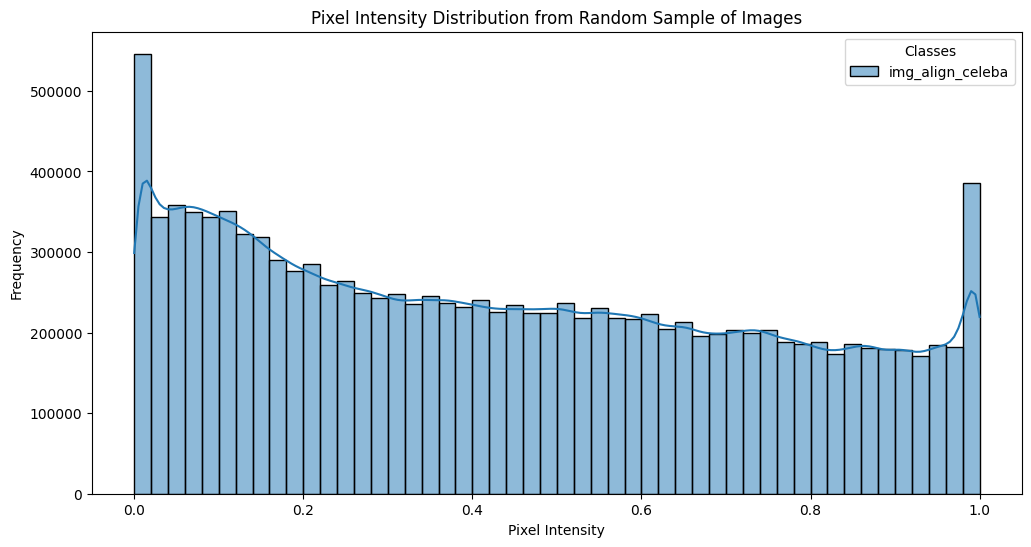

In [ ]:
import torchvision.transforms as transforms
import torch.nn.functional as F  # Importing to use interpolation

def plot_pixel_intensity_distribution_random_sample(dataset, num_samples=1000, image_size=(64, 64)):
    pixel_intensity_data = defaultdict(list)

    sampled_indices = random.sample(range(len(dataset)), num_samples)

    for idx in sampled_indices:
        img, label = dataset[idx]  # Get the image and its label
        class_name = dataset.classes[label]  # Get the class name

        # Resize the image tensor to the desired size
        img = F.interpolate(img.unsqueeze(0), size=image_size, mode='bilinear', align_corners=False).squeeze(0)

        img_flat = img.view(-1).numpy()  # Flatten the image tensor

        pixel_intensity_data[class_name].extend(img_flat)

    plt.figure(figsize=(12, 6))
    for class_name, intensities in pixel_intensity_data.items():
        sns.histplot(intensities, bins=50, kde=True, label=class_name, alpha=0.5)

    plt.title("Pixel Intensity Distribution from Random Sample of Images")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend(title="Classes")
    plt.show()

print("Pixel Intensity Distribution from Random Sample of 1000 Images:")
plot_pixel_intensity_distribution_random_sample(celeba_dataset, num_samples=1000)
